In [2]:
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
root_path = '/content/drive/MyDrive/crop_desease_dataset.zip'

In [5]:
import zipfile
zipr=zipfile.ZipFile(root_path,"r")
zipr.extractall("")
zipr.close()

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
directory='crop_desease_dataset/train',
seed=123,
shuffle = True,
image_size=(224,224),
batch_size = 16
)

Found 3440 files belonging to 13 classes.


In [7]:
class_names=dataset.class_names
class_names

['corn_Blight',
 'corn_Common_Rust',
 'corn_Gray_Leaf_Spot',
 'maize_streak virus',
 'rice_Bacterial leaf blight',
 'rice_Brown spot',
 'rice_Leaf smut',
 'sugarcane_Mosaic',
 'sugarcane_RedRot',
 'sugarcane_Rust',
 'sugarcane_Yellow',
 'wheat_septoria',
 'wheat_stripe_rust']

In [8]:
for image_batch,label_batch in dataset.take(1):
    print("Image Batch Shape : ", image_batch.shape)
    print("Single Image : ", image_batch[0])
    print("Label Image numpy : ", label_batch.numpy)

Image Batch Shape :  (16, 224, 224, 3)
Single Image :  tf.Tensor(
[[[132.73851  158.77423   62.309948]
  [120.97832  137.22958   57.15816 ]
  [127.16709  129.07526   55.38903 ]
  ...
  [212.0931   214.98598  224.02168 ]
  [214.60715  214.60715  224.60715 ]
  [212.86989  212.86989  222.86989 ]]

 [[153.34822  171.45535   80.81505 ]
  [129.98851  144.58035   59.484695]
  [119.22576  131.0051    51.17092 ]
  ...
  [211.8278   214.72069  223.7564  ]
  [211.85332  211.85332  221.85332 ]
  [213.71556  213.71556  223.71556 ]]

 [[160.9375   173.00893   88.10842 ]
  [155.90308  169.29591   79.19516 ]
  [132.59694  151.31761   62.456635]
  ...
  [211.0357   213.92859  222.9643  ]
  [211.97066  211.97066  221.97066 ]
  [214.59312  214.59312  224.59312 ]]

 ...

 [[214.       215.       219.9643  ]
  [214.9643   215.9643   220.92859 ]
  [214.9643   215.9643   220.92859 ]
  ...
  [105.24484  120.28055   53.068863]
  [120.962845 137.0215    62.765186]
  [138.21303  152.92729   71.5344  ]]

 [[214. 

In [9]:
!ls crop_desease_dataset/train

 corn_Blight	      'rice_Bacterial leaf blight'   sugarcane_RedRot   wheat_stripe_rust
 corn_Common_Rust     'rice_Brown spot'		     sugarcane_Rust
 corn_Gray_Leaf_Spot  'rice_Leaf smut'		     sugarcane_Yellow
'maize_streak virus'   sugarcane_Mosaic		     wheat_septoria


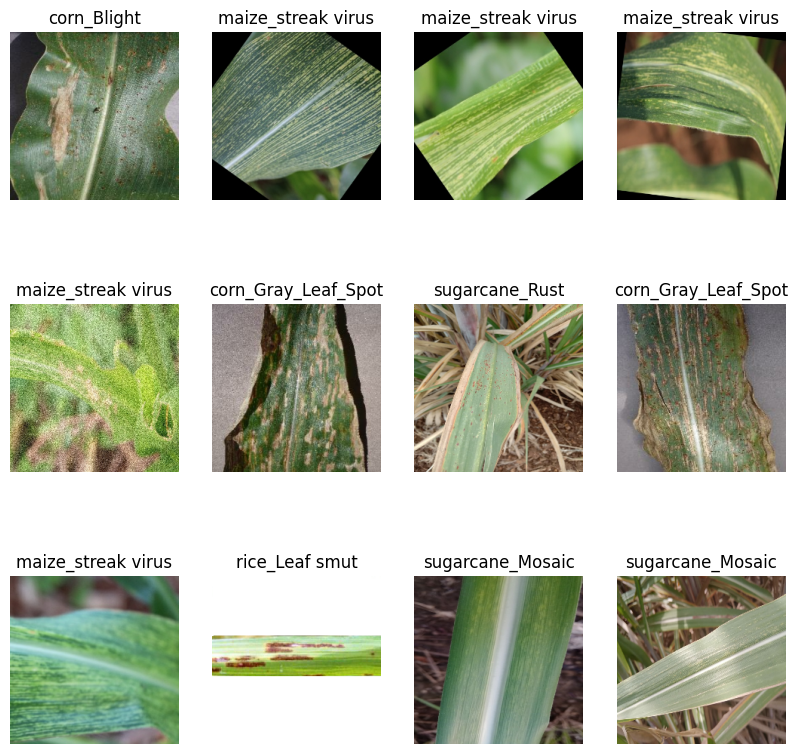

In [10]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    # Code to process the first batch of images and labels
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [11]:
train_datagen = ImageDataGenerator(
        rescale=1./255,#Scaling pixels values b/w 0 to 1
        shear_range=0.2,# Random shear
        zoom_range=0.2,# Random zoom
        horizontal_flip=True)# Flipping of images horizontaly is allowed.

# Ensuring the size of test data b/w 0 to 1
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
training_set = train_datagen.flow_from_directory(
        'crop_desease_dataset/train/',
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical')


Found 3440 images belonging to 13 classes.


In [13]:
test_set = test_datagen.flow_from_directory(
        'crop_desease_dataset/test',
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical')

Found 1239 images belonging to 13 classes.


In [14]:
classifier = Sequential()

classifier.add(Convolution2D(16, (3, 3), input_shape=(224, 224, 3), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Convolution2D(32, (3, 3), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Convolution2D(48, (3, 3), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dropout(0.4))
classifier.add(Dense(units=512, activation = 'relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=128, activation = 'relu'))


# Change the final layer to have 13 output neurons with softmax activation
classifier.add(Dense(units=13, activation = 'softmax')) # Changed to 13 units and softmax activation

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
print(classifier.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 48)          │          13,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32448)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32448)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      16,613,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,700,189 (63.71 MB)

 Trainable params: 16,700,189 (63.71 MB)

 Non-trainable params: 0 (0.00 B)

None


In [1]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = classifier.fit(
    training_set,
    epochs=30,
    validation_data=test_set,
)

Epoch 1/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9330 - loss: 0.2124 - val_accuracy: 0.7474 - val_loss: 1.0851
Epoch 2/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 210s 969ms/step - accuracy: 0.9216 - loss: 0.2305 - val_accuracy: 0.7611 - val_loss: 1.0135
Epoch 3/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 263s 972ms/step - accuracy: 0.9429 - loss: 0.1957 - val_accuracy: 0.7328 - val_loss: 1.1816
Epoch 4/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 209s 964ms/step - accuracy: 0.9343 - loss: 0.1890 - val_accuracy: 0.7450 - val_loss: 1.2794
Epoch 5/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 263s 966ms/step - accuracy: 0.9578 - loss: 0.1392 - val_accuracy: 0.7546 - val_loss: 1.0484
Epoch 6/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 209s 962ms/step - accuracy: 0.9351 - loss: 0.1936 - val_accuracy: 0.7312 - val_loss: 1.1465
Epoch 7/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 211s 972ms/step - accuracy: 0.9433 - loss: 0.1656 - val_accuracy: 0.7385 - val_loss: 1.2061
Epoch 8/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 207s 954ms/step - accuracy: 0.9490 - lo

In [99]:
val_accuracy = history.history['val_accuracy'][-1]
print("Accuracy:",val_accuracy*100)

Accuracy: 77.48184204101562


In [105]:
model = classifier.save("drive/My Drive/HD/db/model1.h5")

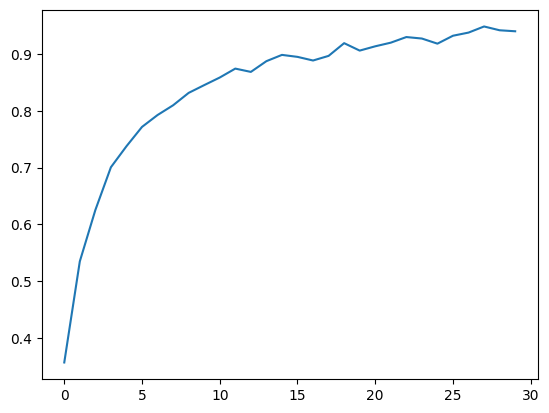

In [101]:
plt.plot(history.history['accuracy'])

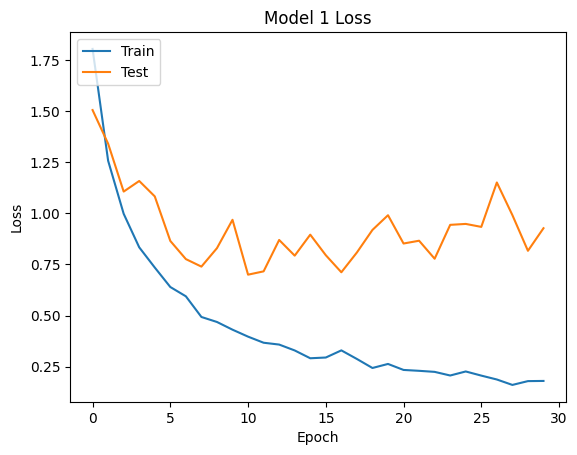

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

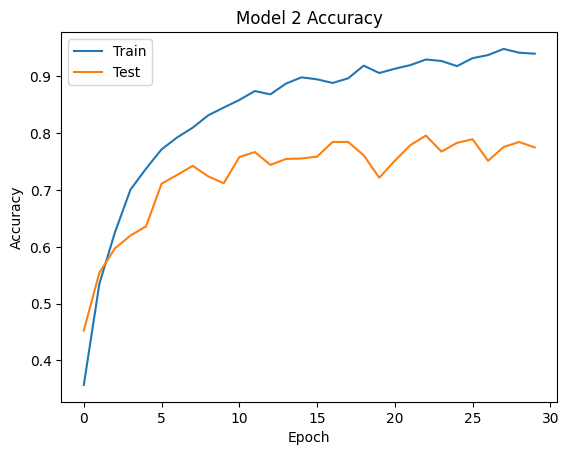

In [103]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [24]:
classifier.save("drive/My Drive/HD/db/model1.h5")  # Save the model

model = keras.models.load_model("drive/My Drive/HD/db/model1.h5") # Load the model

NameError: name 'classifier' is not defined

first image to predict
actual label: wheat_septoria
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
predicted label: wheat_septoria


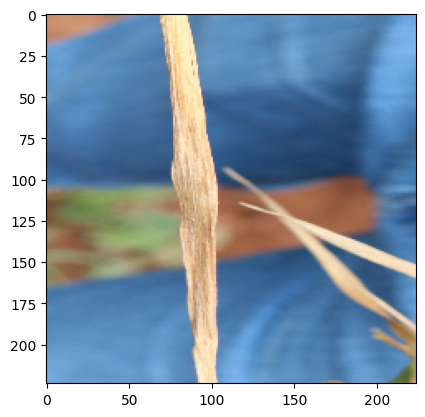

In [119]:
import numpy as np
images_batch, labels_batch = next(test_set)

first_image = images_batch[0]
first_label = labels_batch[0]

print("first image to predict")
plt.imshow(first_image)
print("actual label:",class_names[np.argmax(first_label)])

batch_prediction = model.predict(images_batch)
print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [25]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence


NameError: name 'model' is not defined

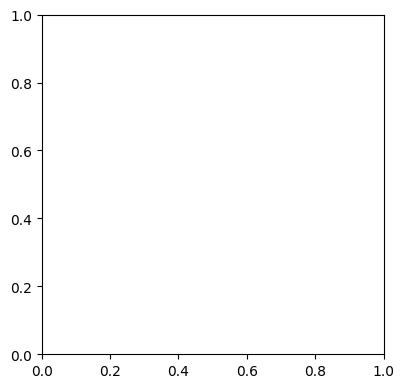

In [26]:
plt.figure(figsize=(15, 15))
images, labels = next(test_set)
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = images[i]
    predicted_class, confidence = predict(model, img)
    actual_class = class_names[np.argmax(labels[i])]

    plt.imshow(img.astype("uint8"))
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
    plt.axis("off")
plt.show()

In [4]:
import tensorflow as tf
print(tf.__version__)

2.17.1
